# Numerical Variables

Arranging numerical data into a frequency distribution table, the same as we did with a categorical data is impractical for analysis. Especially if we have a lot of numbers and all of them are different.

Hence, when dealing with numerical data it makes much more sense to group it into intervals.

Generally, statistions prefer to group data into 5 to 20 intervals. But it depends on the number of data... .

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Our example:

In [3]:
freq_table = pd.DataFrame({
    "Dataset" : [1, 9, 22, 34, 29, 41, 44, 48, 57, 66, 70, 73, 75, 76, 79, 82, 87, 89, 95, 100],
    "Frequency" : [1]*20
})

freq_table

,Dataset,Frequency
0,1,1
1,9,1
2,22,1
3,34,1
4,29,1
5,41,1
6,44,1
7,48,1
8,57,1
9,66,1


For our example we will divide the data into 5 intervals of equal length.

$$
\text{Interval length} = \frac{\max(x_i) - \min(x_i)}{k}
$$

where $k$ is the number of desired intervals.


In [4]:
k =5
step = (np.max(freq_table["Dataset"]) - np.min(freq_table["Dataset"]))/k
print(f"Interval length: {step}")

Interval length: 19.8


Sometimes we want to round that number UP to reach a neater representation.

In [5]:
step = int(np.ceil(step))
print(f"Interval length: {step}")

Interval length: 20


A number is included in an interval if that number:
1) Is GREATER than the lower bound
2) Is LOWER or EQUAL to the upper bound.

In [6]:
min_val = freq_table["Dataset"].min()
max_val = freq_table["Dataset"].max()

interval_ends = [min_val + step * (i+1) for i in range(5)]
interval_starts = [min_val] + interval_ends[:-1]

intervals = []
frequencies = []

for start, end in zip(interval_starts, interval_ends):
    if start == min_val:
        mask = freq_table["Dataset"] <= end
    else:
        mask = (freq_table["Dataset"] > start) & (freq_table["Dataset"] <= end)
    freq = freq_table.loc[mask, "Frequency"].sum()
    intervals.append((start, end))
    frequencies.append(freq)

interval_table = pd.DataFrame(intervals, columns=["Interval start", "Interval end"])
interval_table["Frequency"] = frequencies

interval_table

,Interval start,Interval end,Frequency
0,1,21,2
1,21,41,4
2,41,61,3
3,61,81,6
4,81,101,5


$$
\text{Relative Frequency} = \frac{Frequency}{Total frequency}
$$

In [7]:
interval_table["Relative frequency"] = round(interval_table["Frequency"]/interval_table["Frequency"].sum()*100, 0)
interval_table

,Interval start,Interval end,Frequency,Relative frequency
0,1,21,2,10.0
1,21,41,4,20.0
2,41,61,3,15.0
3,61,81,6,30.0
4,81,101,5,25.0


## Histogram

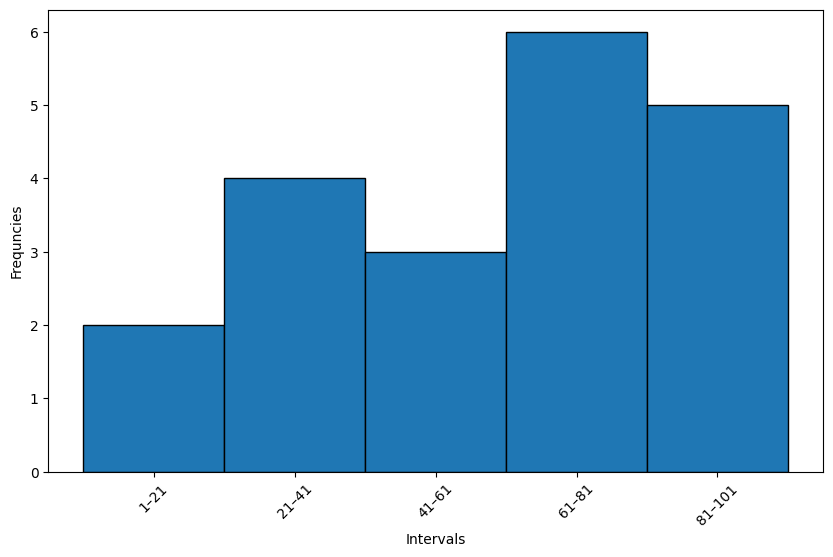

In [ ]:
plt.figure(figsize=(10, 6))

interval_table['Midpoint'] = (interval_table["Interval end"] + interval_table["Interval start"])/2

plt.bar(interval_table["Midpoint"],interval_table['Frequency'], width=step, edgecolor="black", align='center')

interval_labels = interval_table["Interval start"].astype(str) + "–" + interval_table["Interval end"].astype(str)

plt.xticks(interval_table["Midpoint"], interval_labels, rotation=45)

plt.xlabel("Intervals")
plt.ylabel("Frequncies")
plt.show()

Looks like a bar chart but conveys a very different information. Y axes shows the absolute frequency as in a bar chart, but this time the horizontal axis is numerical too. The bars touching indicates the continiusness.  

A histogram for relative frequncies:

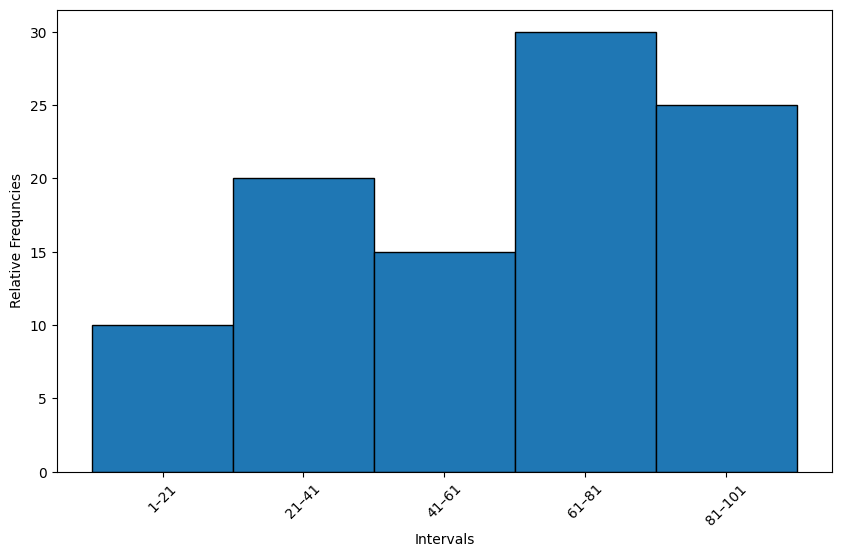

In [28]:
plt.figure(figsize=(10, 6))

interval_table['Midpoint'] = (interval_table["Interval end"] + interval_table["Interval start"])/2

plt.bar(interval_table["Midpoint"],interval_table['Relative frequency'], width=step, edgecolor="black", align='center')

interval_labels = interval_table["Interval start"].astype(str) + "–" + interval_table["Interval end"].astype(str)

plt.xticks(interval_table["Midpoint"], interval_labels, rotation=45)

plt.xlabel("Intervals")
plt.ylabel("Relative Frequncies")
plt.show()